# Plots for performance analysis

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns   

### 1. Data Loading

In [22]:
addi = pd.read_csv('results/Addition_results.csv')
multi = pd.read_csv('results/Multiplication_results.csv')   
scal_multi = pd.read_csv('results/ScalarMultiplication_results.csv')           
scal_addi = pd.read_csv('results/Scalar_results.csv')

parties = pd.read_csv('results/party_results.csv')    


In [23]:
addi.head()

,Parties,Operations,Time
0,20,1000,59.520953
1,20,1000,63.491115
2,20,1000,66.809279
3,20,1000,64.048519
4,20,1000,56.334017


### 2. SMC Run Time (operations)

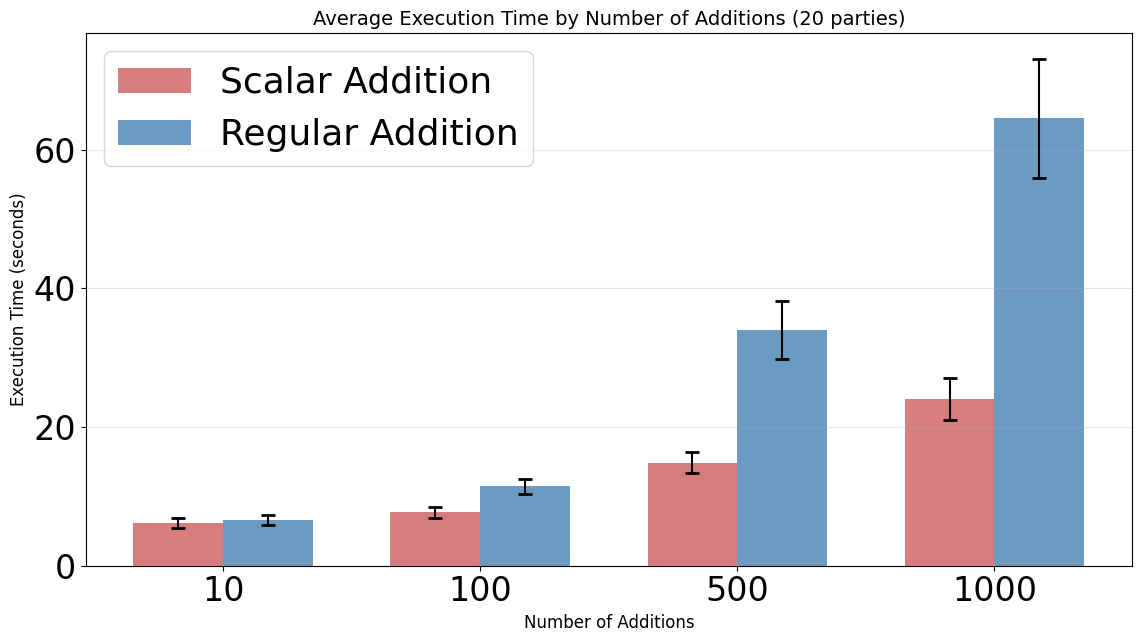

In [24]:
# MEAN and STD 
grouped_addi = addi.groupby('Operations')['Time'].agg(['mean', 'std']).reset_index()
grouped_scal = scal_addi.groupby('Operations')['Time'].agg(['mean', 'std']).reset_index()

operations = sorted(set(grouped_addi['Operations'].tolist() + grouped_scal['Operations'].tolist()))

# PLOT
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
x_positions = np.arange(len(operations))


bars2 = ax.bar(x_positions - bar_width/2, grouped_scal['mean'],bar_width, color='indianred', alpha=0.8, label='Scalar Addition')
ax.errorbar(x_positions - bar_width/2, grouped_scal['mean'], yerr=grouped_scal['std'],fmt='none', ecolor='black', capsize=5, capthick=2, elinewidth=1.5)

bars1 = ax.bar(x_positions + bar_width/2, grouped_addi['mean'], bar_width, color='steelblue', alpha=0.8, label='Regular Addition')
ax.errorbar(x_positions + bar_width/2, grouped_addi['mean'], yerr=grouped_addi['std'], fmt='none', ecolor='black', capsize=5, capthick=2, elinewidth=1.5)


ax.set_xlabel('Number of Additions', fontsize=12)
ax.set_ylabel('Execution Time (seconds)', fontsize=12)
ax.set_title('Average Execution Time by Number of Additions (20 parties)', fontsize=14)
ax.set_xticks(x_positions)
ax.set_xticklabels(operations)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
def group_data(df):
    return df.groupby('Operations')['Time'].agg(['mean', 'std']).reset_index()

grouped_add = group_data(addi)
grouped_scal_add = group_data(scal_addi)
grouped_mult = group_data(multi)
grouped_scal_mult = group_data(scal_multi)


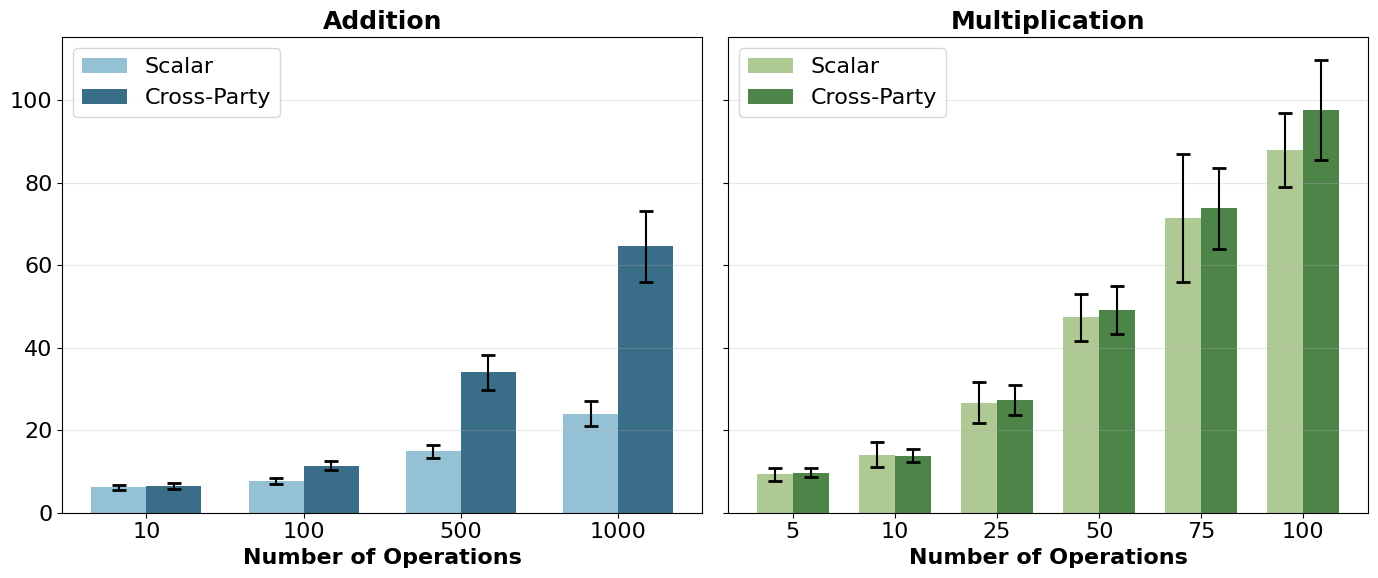

In [26]:

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)


def create_comparison_plot(ax, grouped_data, grouped_scal_data, title, bar_color, scal_bar_color):
    operations = sorted(set(grouped_data['Operations'].tolist() + grouped_scal_data['Operations'].tolist()))
    x_positions = np.arange(len(operations))
    bar_width = 0.35


    ax.bar(x_positions - bar_width/2, grouped_scal_data['mean'], bar_width, color=scal_bar_color, alpha=0.9, label='Scalar')
    ax.bar(x_positions + bar_width/2, grouped_data['mean'], bar_width, color=bar_color, alpha=0.9, label='Cross-Party')

    ax.errorbar(x_positions - bar_width/2, grouped_scal_data['mean'], yerr=grouped_scal_data['std'], fmt='none', ecolor='black', capsize=5, capthick=2, elinewidth=1.5)
    ax.errorbar(x_positions + bar_width/2, grouped_data['mean'], yerr=grouped_data['std'], fmt='none', ecolor='black', capsize=5, capthick=2, elinewidth=1.5)

    ax.set_xlabel('Number of Operations', fontweight='bold')
    ax.set_title(title, fontweight='bold')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(operations)
    ax.legend(loc='upper left')
    ax.grid(axis='y', alpha=0.3)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

create_comparison_plot(ax1, grouped_add, grouped_scal_add, 'Addition', '#245d7a', '#8abbd0')
create_comparison_plot(ax2, grouped_mult, grouped_scal_mult, 'Multiplication', '#3a7734', '#a6c48a')


plt.tight_layout()
plt.savefig('operation_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

### 3. SMC Run Time (parties)

In [27]:
from sklearn.linear_model import LinearRegression

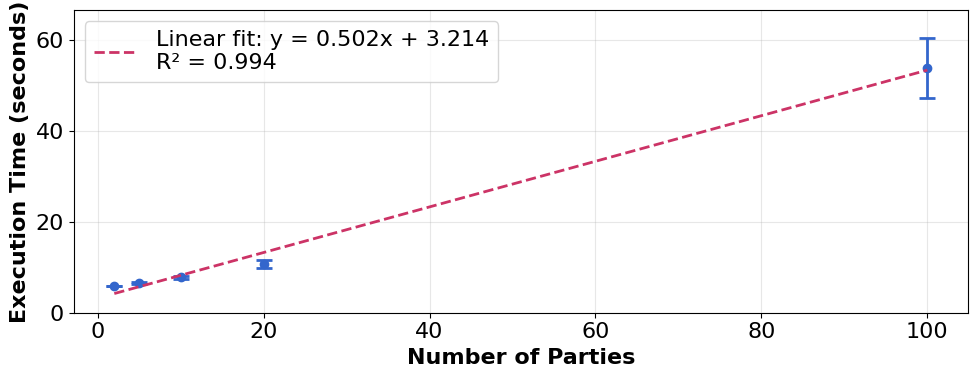

In [28]:

# Group data
grouped_parties = parties.groupby('Parties')['Time'].agg(['mean', 'std']).sort_values('Parties')

# Linear regression
X = grouped_parties.index.values.reshape(-1, 1)
y = grouped_parties['mean'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r_squared = model.score(X, y)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(grouped_parties.index, grouped_parties['mean'], marker='o', linewidth=0, color='#3366cc')
plt.errorbar(grouped_parties.index, grouped_parties['mean'], yerr=grouped_parties['std'], fmt='none', ecolor='#3366cc', capsize=6, capthick=2, elinewidth=2)
plt.plot(grouped_parties.index, y_pred, linestyle='--', linewidth=2, color='#cc3366', label=f'Linear fit: y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}\nR² = {r_squared:.3f}')

# Styling
plt.xlabel('Number of Parties', fontweight='bold')
plt.ylabel('Execution Time (seconds)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.ylim(0, max(grouped_parties['mean'] + grouped_parties['std']) * 1.1)

# Save and show
plt.savefig('time_vs_parties.pdf', bbox_inches='tight', dpi=300)
plt.show()

### 4. Network Performance

In [14]:
exp1 = pd.read_json('results/network_exp1_14-03_13-12-51.json')     
exp1.head()     

,2,5,10,20,30,40,50,60,70,80,90,100
0,"[2508, 1481]","[9208, 6028]","[25167, 18054]","[79029, 60317]","[161909, 128967]","[273473, 221190]","[413806, 339080]","[589880, 480734]","[792584, 653338]","[1020726, 848373]","[1278511, 1062971]","[1565558, 1314849]"
1,"[2477, 1440]","[9044, 5933]","[25242, 18363]","[79126, 61345]","[161849, 128646]","[273413, 221169]","[418040, 338899]","[582887, 480680]","[791898, 649393]","[1022769, 849727]","[1280961, 1068147]","[1565343, 1308832]"
2,"[2478, 1441]","[9028, 5865]","[25154, 17933]","[79101, 60693]","[161809, 128316]","[273405, 220381]","[413747, 338825]","[582944, 479498]","[789880, 649998]","[1021205, 852918]","[1280259, 1065585]","[1565091, 1302974]"
3,"[2498, 1471]","[9030, 5871]","[25294, 18093]","[79067, 60925]","[161897, 129506]","[273616, 223946]","[413803, 337458]","[590505, 487190]","[785844, 653875]","[1020979, 846367]","[1279755, 1066451]","[1565033, 1309667]"
4,"[2477, 1440]","[9051, 5932]","[25162, 17932]","[79161, 61703]","[161836, 128256]","[273375, 220000]","[413685, 336509]","[585795, 481212]","[786607, 654747]","[1020950, 844837]","[1280710, 1064336]","[1564540, 1311288]"


In [16]:
exp2 = pd.read_json('results/network_exp2_14-03_13-39-52.json')     
exp3 = pd.read_json('results/network_exp3_14-03_13-46-57.json')   
exp4 = pd.read_json('results/network_exp4_14-03_14-12-00.json') 
exp5 = pd.read_json('results/network_exp5_14-03_14-30-47.json') 

In [17]:
from matplotlib.ticker import ScalarFormatter

In [18]:
def process_experiment(exp_df):
    sent_mean = []
    sent_std = []
    received_mean = []
    received_std = []
    
    for col in exp_df.columns:
        sent = np.array([row[col][0] for index, row in exp_df.iterrows()])
        received = np.array([row[col][1] for index, row in exp_df.iterrows()])
        
        sent_mean.append(np.mean(sent))
        sent_std.append(np.std(sent))
        received_mean.append(np.mean(received))
        received_std.append(np.std(received))
    
    return (np.array(sent_mean), np.array(sent_std), 
            np.array(received_mean), np.array(received_std))

In [19]:
SMALL_SIZE = 19
MEDIUM_SIZE = 24
LARGE_SIZE = 26

# Set font sizes globally
plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LARGE_SIZE)    # legend fontsize

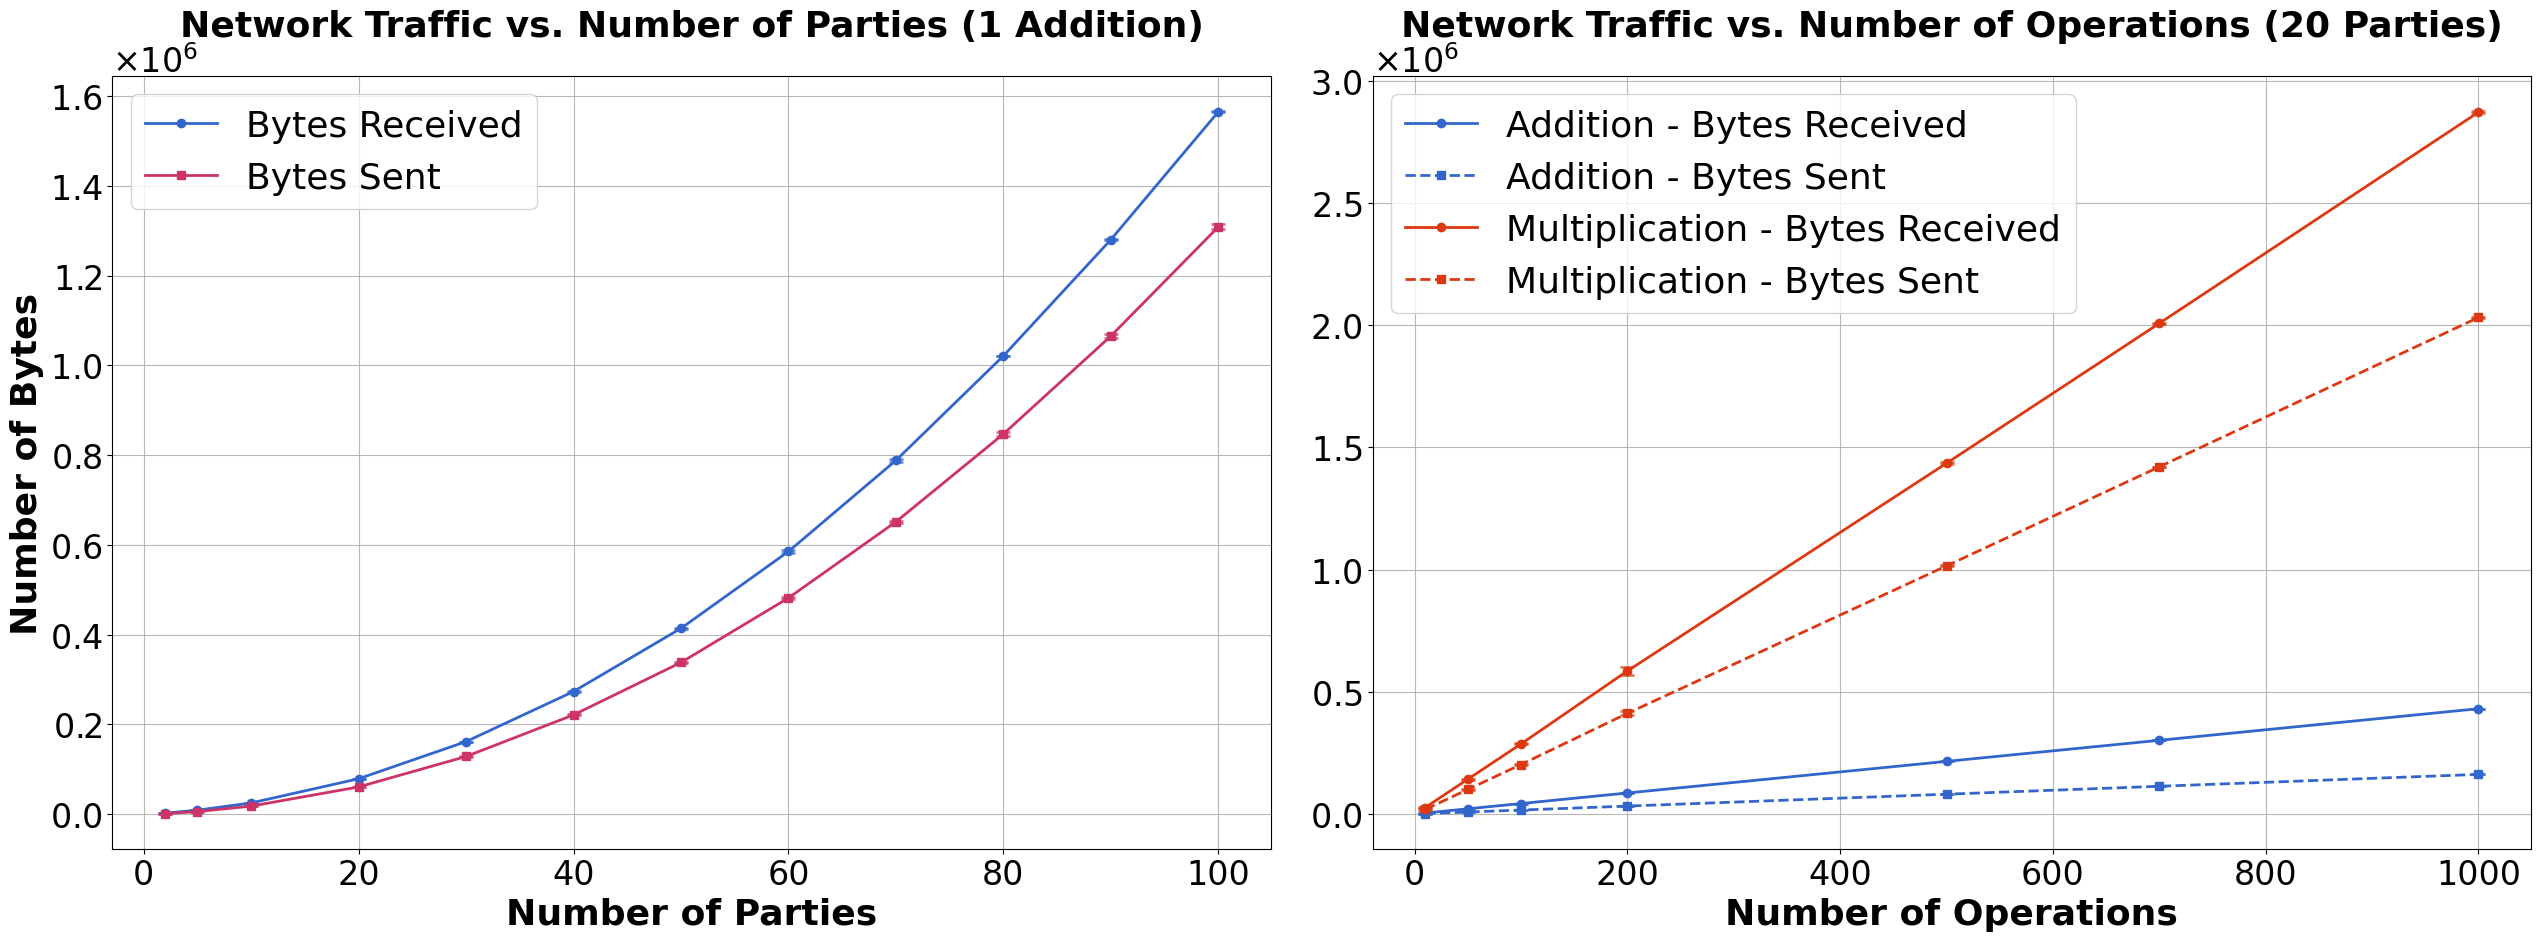

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 10))

# --- Left Plot: Party Scaling ---
parties = exp1.columns.astype(int)
sent_mean, sent_std, recv_mean, recv_std = process_experiment(exp1)


ax1.plot(parties, sent_mean, marker='o', linewidth=2, color='#3366cc', label='Bytes Received')
ax1.errorbar(parties, sent_mean, yerr=sent_std,fmt='none', ecolor='#3366cc', capsize=5, capthick=2, elinewidth=1.5, alpha=0.7)

ax1.plot(parties, recv_mean, marker='s', linewidth=2, color='#cc3366', label='Bytes Sent')
ax1.errorbar(parties, recv_mean, yerr=recv_std, fmt='none', ecolor='#cc3366', capsize=5, capthick=2, elinewidth=1.5, alpha=0.7)


ax1.set_xlabel('Number of Parties', fontweight='bold')
ax1.set_ylabel('Number of Bytes', fontweight='bold')
ax1.set_title('Network Traffic vs. Number of Parties (1 Addition)', fontweight='bold')
ax1.grid(True, alpha=0.9)
ax1.legend()


# --- Right Plot: Operation Comparison ---
experiments = [exp3, exp5]
colors = ['#3366cc', '#dc3912']
labels = ['Addition', 'Multiplication']

for exp, color, label in zip(experiments, colors, labels):
    operations = exp.columns.astype(int)
    sent_mean, sent_std, recv_mean, recv_std = process_experiment(exp)
    
    ax2.plot(operations, sent_mean, marker='o', linewidth=2, color=color, label=f'{label} - Bytes Received')
    ax2.errorbar(operations, sent_mean, yerr=sent_std, fmt='none', ecolor=color, capsize=5,capthick=2, elinewidth=1.5, alpha=0.7)
    
    ax2.plot(operations, recv_mean, marker='s', linewidth=2, color=color, linestyle='--', label=f'{label} - Bytes Sent')
    ax2.errorbar(operations, recv_mean, yerr=recv_std, fmt='none', ecolor=color, capsize=5, capthick=2, elinewidth=1.5, alpha=0.7)


ax2.set_xlabel('Number of Operations', fontweight='bold')
#ax2.set_ylabel('Number of Bytes', fontweight='bold')
ax2.set_title('Network Traffic vs. Number of Operations (20 Parties)', fontweight='bold')
ax2.grid(True, alpha=0.9)
ax2.legend(ncol=1)

# Scientific notation for y axis
for ax in [ax1, ax2]:
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('network_performance_combined.pdf', bbox_inches='tight', dpi=300)
plt.show()